# **Types Of Gradient Decent**

In [182]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
%matplotlib inline


In [183]:
data = pd.read_csv("S:/Github/DATASET/homeprices_banglore.csv")
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [184]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_data = sx.fit_transform(data.drop(columns=['price']))
y_data = sy.fit_transform(data['price'].values.reshape(data.shape[0], 1))

X_data[0:5] , y_data[0:5]


(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074]]))

**Batch - Gradient**

In [185]:
def batch_gradient_decent(x,y, learning_rate =0.001 , ep =100): 
    features = x.shape[1]
    total_samples = x.shape[0]
    weight = np.ones(features)
    bias = 0
    
    cost_list = []
    epochs = []

    for i in range(ep):
        y_pred = np.dot(x, weight) + bias  # Corrected matrix multiplication

        w_grad = -(2 / total_samples) * np.dot(x.T, (y - y_pred)) # corrected w_grad calc
        b_grad = -(2 / total_samples) * np.sum(y - y_pred) # corrected b_grad calc

        weight = weight - learning_rate * w_grad
        bias = bias - learning_rate * b_grad

        cost = np.mean(np.square(y - y_pred))
        if i % 10 == 0:
            cost_list.append(cost)
            epochs.append(i)

    return weight, bias, cost_list, epochs

weight, bias, cost_list, epochs = batch_gradient_decent(X_data, y_data.reshape(y_data.shape[0]), learning_rate=0.01, ep=1000)



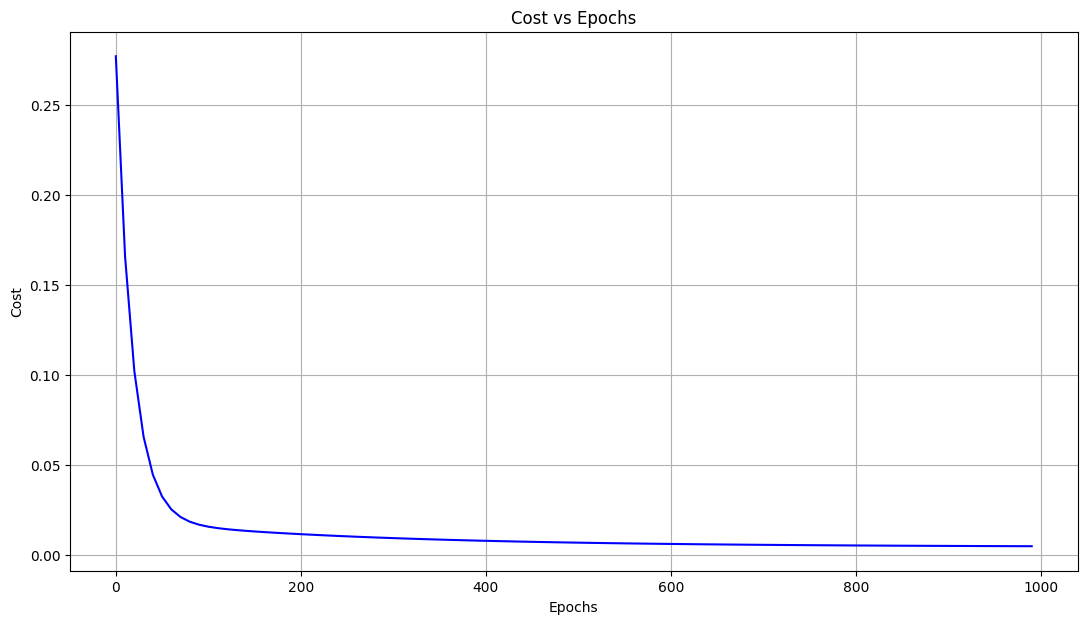

In [186]:
import matplotlib.pyplot as plt

def plot_cost(cost_list, epochs):
    plt.figure(figsize=(13, 7))  # Set figure size
    plt.plot(epochs, cost_list, color='blue')  # Plot cost vs epochs
    plt.xlabel('Epochs')  # Label x-axis
    plt.ylabel('Cost')  # Label y-axis
    plt.title('Cost vs Epochs')  # Set plot title
    plt.grid()  
    plt.show() #show the plot

plot_cost(cost_list, epochs)    

In [187]:
def predict(x, weight, bias):
    return np.dot(x, weight) + bias
    
  # Predicting the first 5 samples
predicted_y = predict(X_data[0:5], weight, bias)

inverse_y = sy.inverse_transform(predicted_y.reshape(predicted_y.shape[0], 1))  # Inverse transform y_data
inverse_y = inverse_y.flatten()  # Flatten the array for better readability
inverse_y[0:5]  # Display the first 5 predictions

array([ 36.33475492, 124.9756119 ,  68.64949108,  71.15583406,
        40.79047578])

**stochastic Gradient-decent**

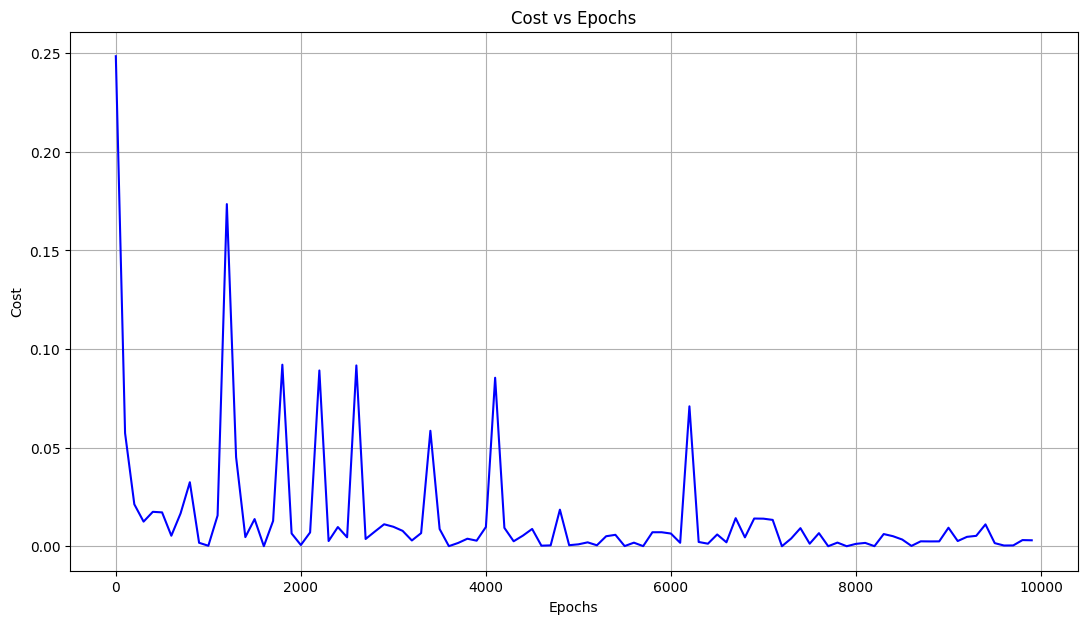

In [188]:
def stochastic_gradient_decent(x,y, learning_rate =0.001 , ep =100): 
    features = x.shape[1]
    total_samples = x.shape[0]
    weight = np.ones(features)
    bias = 0
    
    cost_list = []
    epochs = []

    for i in range(ep):

        random_index = random.randint(0, total_samples - 1)
        random_x = x[random_index]
        random_y = y[random_index]

        y_pred = np.dot(random_x, weight) + bias  # Corrected matrix multiplication

        w_grad = -(2 / total_samples) * np.dot(random_x.T, (random_y - y_pred)) # corrected w_grad calc
        b_grad = -(2 / total_samples) * np.sum(random_y - y_pred) # corrected b_grad calc

        weight = weight - learning_rate * w_grad
        bias = bias - learning_rate * b_grad

        cost = np.mean(np.square(random_y - y_pred))
        if i % 100 == 0:
            cost_list.append(cost)
            epochs.append(i)

    return weight, bias, cost_list, epochs


weight, bias, cost_list, epochs = stochastic_gradient_decent(X_data, y_data.reshape(y_data.shape[0]), learning_rate=0.01, ep=10000)

plot_cost(cost_list, epochs)  

In [189]:
def predict(x, weight, bias):
    return np.dot(x, weight) + bias
    
  # Predicting the first 5 samples
predicted_y = predict(X_data[0:5], weight, bias)

inverse_y = sy.inverse_transform(predicted_y.reshape(predicted_y.shape[0], 1))  # Inverse transform y_data
inverse_y = inverse_y.flatten()  # Flatten the array for better readability
inverse_y[0:5]  # Display the first 5 predictions

array([ 31.80920206, 127.96385155,  67.14344297,  69.80372594,
        36.538594  ])

**mini-batch Gradient Decent**

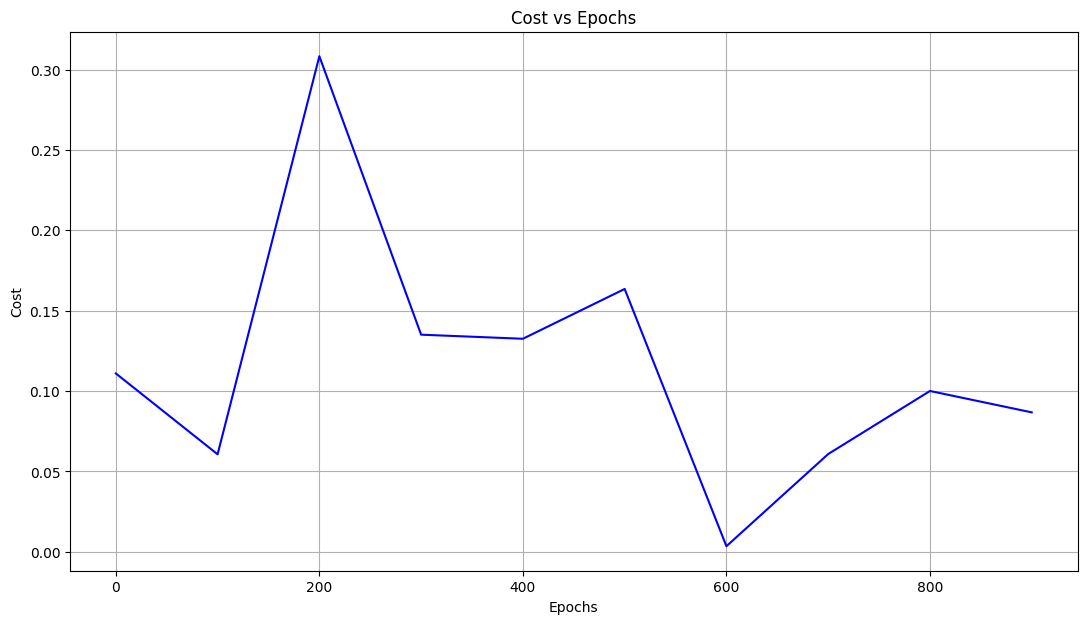

In [190]:
def mini_batch_gradient_decent(x,y, learning_rate =0.001 , ep =100): 
    features = x.shape[1]
    total_samples = x.shape[0]
    weight = np.ones(features)
    bias = 0
    batch_size = 10 # Define batch size
    
    cost_list = []
    epochs = []

    for i in range(ep):
        random_batch = random.sample(range(total_samples), batch_size)
        random_x = x[random_batch]
        random_y = y[random_batch]

        y_pred = np.dot(random_x, weight) + bias  # Corrected matrix multiplication

        w_grad = -(2 / total_samples) * np.dot(random_x.T, (random_y - y_pred)) # corrected w_grad calc
        b_grad = -(2 / total_samples) * np.sum(random_y - y_pred) # corrected b_grad calc

        weight = weight - learning_rate * w_grad
        bias = bias - learning_rate * b_grad

        cost = np.mean(np.square(random_y - y_pred))
        if i % 100 == 0:
            cost_list.append(cost)
            epochs.append(i)

    return weight, bias, cost_list, epochs

weight, bias, cost_list, epochs = stochastic_gradient_decent(X_data, y_data.reshape(y_data.shape[0]), learning_rate=0.01, ep=1000)
plot_cost(cost_list, epochs)



In [191]:
def predict(x, weight, bias):
    return np.dot(x, weight) + bias
    
  # Predicting the first 5 samples
predicted_y = predict(X_data[0:5], weight, bias)

inverse_y = sy.inverse_transform(predicted_y.reshape(predicted_y.shape[0], 1))  # Inverse transform y_data
inverse_y = inverse_y.flatten()  # Flatten the array for better readability
inverse_y[0:5]  # Display the first 5 predictions

array([ 36.88913714, 156.16151688,  80.81867961,  84.09764466,
        42.71840835])